# EDA ASSIGNMENT

### Importing Required Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset(Titanic.csv)

In [27]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Using the info() method to get information about the dataset.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


    Dataset contains 891 rows and 12 columns, the Age columns contain some null values.

In [29]:
del df['Cabin']

In [30]:
df = df.dropna()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


### Using the describe() method to describe the dataset.

In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### Use the groupby() method to group the data based on the Pclass column and calculate the mean fare for each class.

In [33]:
mean_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print(mean_fare_by_class)

Pclass
1    88.048121
2    21.471556
3    13.229435
Name: Fare, dtype: float64


### Use the value_counts() method to get the frequency count of the Embarked column.

In [34]:
embarked_counts = df['Embarked'].value_counts()
print(embarked_counts)

S    554
C    130
Q     28
Name: Embarked, dtype: int64


### Create a new column in the dataframe called AgeRange that categorises passengers into age ranges: "Child" for ages 0-12, "Teen" for ages 13-19, "Adult" for ages 20-59, and "Senior" for ages 60 and above.

In [35]:
age_bins = [0, 12, 19, 59, df['Age'].max()]
age_labels = ["Child", "Teen", "Adult", "Senior"]
df['AgeRange'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

### Use the pivot_table() method to create a pivot table that shows the survival rate of passengers based on their sex, class, and age range.

In [36]:
pivot_table = df.pivot_table('Survived', index=['Sex', 'Pclass', 'AgeRange'], aggfunc='mean')
print(pivot_table)

                        Survived
Sex    Pclass AgeRange          
female 1      Child     0.000000
              Teen      1.000000
              Adult     0.970149
              Senior    1.000000
       2      Child     1.000000
              Teen      1.000000
              Adult     0.896552
       3      Child     0.478261
              Teen      0.590909
              Adult     0.392857
              Senior    1.000000
male   1      Child     1.000000
              Teen      0.250000
              Adult     0.425000
              Senior    0.142857
       2      Child     1.000000
              Teen      0.100000
              Adult     0.052632
              Senior    0.250000
       3      Child     0.360000
              Teen      0.078947
              Adult     0.139785
              Senior    0.000000


### Create a bar chart that shows the total number of passengers in each age range.

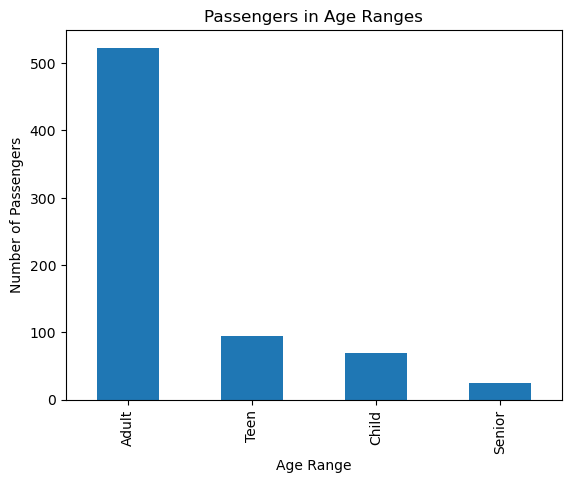

In [37]:
age_range_counts = df['AgeRange'].value_counts()
age_range_counts.plot(kind='bar')
plt.title('Passengers in Age Ranges')
plt.xlabel('Age Range')
plt.ylabel('Number of Passengers')
plt.show()

### Create a scatter plot that shows the relationship between age and fare. Color the points based on whether the passenger survived or not.

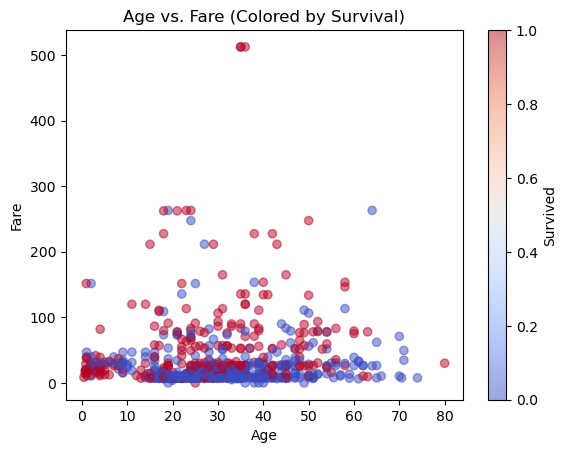

In [38]:
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', alpha=0.5)
plt.title('Age vs. Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survived')
plt.show()